# Comparing Regular Neural Networks and CNNs on MNIST

## Introduction

In this activity, we will build and compare two neural network models for classifying the MNIST dataset:
1. A regular sequential neural network
2. A basic Convolutional Neural Network (CNN)

We'll use TensorFlow to implement both models and compare their performance.

## Objectives

- Implement a regular sequential neural network for image classification
- Implement a basic CNN for image classification
- Compare the performance of both models on the MNIST dataset

## Setup

First, let's import the necessary libraries and load the MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images for the regular neural network
train_images_flat = train_images.reshape((60000, 28 * 28))
test_images_flat = test_images.reshape((10000, 28 * 28))

# Reshape images for the CNN
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

print("Data loaded and preprocessed.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded and preprocessed.


## Task 1: Regular Sequential Neural Network



Let's build and train a regular sequential neural network.

In [3]:
model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_regular = model.fit(train_images_flat, train_labels, epochs=10,
                                 validation_split=0.2, batch_size=32)

regular_test_loss, regular_test_acc = model.evaluate(test_images_flat, test_labels)

print(f"Regular NN - Test accuracy: {regular_test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8649 - loss: 0.4557 - val_accuracy: 0.9599 - val_loss: 0.1359
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9642 - loss: 0.1169 - val_accuracy: 0.9655 - val_loss: 0.1137
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9767 - loss: 0.0768 - val_accuracy: 0.9683 - val_loss: 0.1073
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9815 - loss: 0.0581 - val_accuracy: 0.9693 - val_loss: 0.1065
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9739 - val_loss: 0.0987
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9888 - loss: 0.0333 - val_accuracy: 0.9719 - val_loss: 0.1033
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0272 - val_accuracy: 0.9760 - val_loss: 0.0957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.02



## Task 2: Basic Convolutional Neural Network (CNN)

Now, let's implement a basic CNN for the same task.

In [5]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history_cnn = model.fit(train_images_cnn, train_labels, epochs=10,
                      validation_split=0.2, batch_size=32)

cnn_test_loss, cnn_test_acc = model.evaluate(test_images_cnn, test_labels)
print(f"CNN - Test accuracy: {cnn_test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.8877 - loss: 0.3584 - val_accuracy: 0.9826 - val_loss: 0.0571
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9831 - loss: 0.0527 - val_accuracy: 0.9862 - val_loss: 0.0483
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0.9848 - val_loss: 0.0525
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9852 - val_loss: 0.0467
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9901 - val_loss: 0.0361
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9963 - loss: 0.0105 - val_accuracy: 0.9894 - val_loss: 0.0443
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9967 -

## Task 3: Comparison



Let's compare the performance of both models.

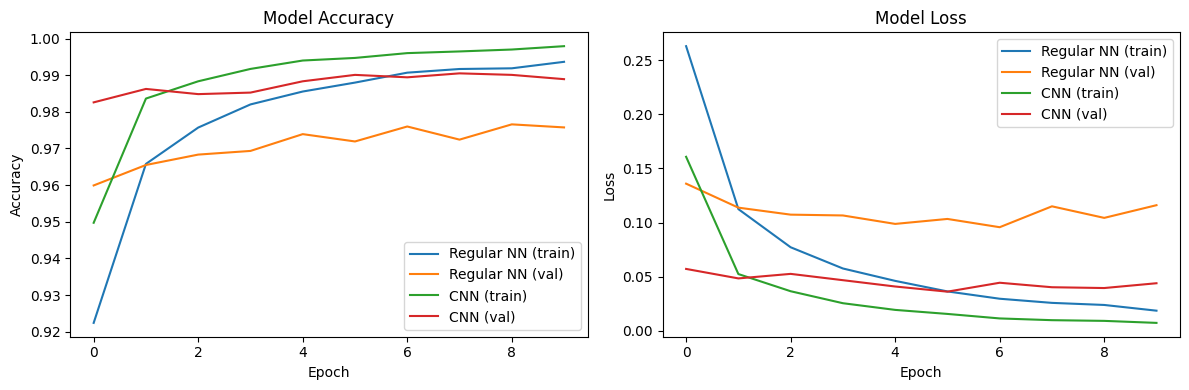

Regular NN - Test accuracy: 0.9763
CNN - Test accuracy: 0.9895


In [8]:
def plot_performance(history_regular, history_cnn):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history_regular.history['accuracy'], label='Regular NN (train)')
    plt.plot(history_regular.history['val_accuracy'], label='Regular NN (val)')
    plt.plot(history_cnn.history['accuracy'], label='CNN (train)')
    plt.plot(history_cnn.history['val_accuracy'], label='CNN (val)')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_regular.history['loss'], label='Regular NN (train)')
    plt.plot(history_regular.history['val_loss'], label='Regular NN (val)')
    plt.plot(history_cnn.history['loss'], label='CNN (train)')
    plt.plot(history_cnn.history['val_loss'], label='CNN (val)')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_performance(history_regular, history_cnn)

print(f"Regular NN - Test accuracy: {regular_test_acc:.4f}")
print(f"CNN - Test accuracy: {cnn_test_acc:.4f}")


## Conclusion

In this activity, we implemented and compared a regular sequential neural network and a basic CNN for classifying the MNIST dataset.

Questions to consider:
1. Which model performed better? Why do you think this is the case?
2. How do the learning curves differ between the two models?
3. What are the advantages and disadvantages of each approach?

Try experimenting with different architectures or hyperparameters to see if you can improve the performance of either model!